# Задача об переворачивании математического маятника
в статье, приведенной мне по ссылке: https://www.gymlibrary.ml/environments/classic_control/pendulum/?highlight=pendulum, не уточняется какой именно маятник,
но пусть он будет математическим с начльными условиями:
$l = 1, m = 1, \theta_1 = \theta_0, \omega_1 =\omega_0 $
Задача состоит в том, что бы перевернуть его в верхнее положение и удерживать его там. Для удобства будем считать, что точка отсчета угла 
Для этого воспользуемся PID регулятором:



Уравнения:

$ml^2\ddot{\theta} + mglsin(\theta) = u \newline
\left\{ \begin{gathered}
\dot{\theta}_0 = \theta_1\\
\dot{\theta}_1 = \frac{u - mglsin(\theta_0)}{l^2m}
\end{gathered}  \right.$

In [323]:
#Начальное значение
from math import *
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt




class Params:

    def __init__(self):

        self.m = 1
        self.l = 1
        self.g = 9.8


In [324]:


def rhs(t, th, p, u):
    
    dthdt = np.zeros(2)
    dthdt[0] = th[1]
    dthdt[1] = (u - p.m*p.g*p.l*(sin(th[0])))/(p.l**2*p.m)
    
    return dthdt


In [325]:
class PID_Controller():
    def __init__(self, dt, kp, ki, kd):
        self.kp = kp
        self.ki = ki
        self.kd = kd
        self.dt = dt
        self.integral = 0
        self.e_prev = None

    def update(self, state, reference):
        error = state - reference
        if self.e_prev is None:
            dedt = 0
        else:
            # первый порядок апроксимации
            dedt = (error - self.e_prev) / self.dt
        
        self.integral = self.integral + error * self.dt
        
        self.e_prev = error
        print(error)
        return self.kp * error + self.ki * self.integral + self.kd * dedt


In [326]:


# Решатель
def solve(t0, tf, dt, th0, p, pid1):
    time = np.arange(t0, tf, dt)
    result = th0
    force = []
    
    for i in range(len(time) - 1):
    
        u = -pid1.update(th0[0], pi)
        force = np.append(force, u)
        solution = solve_ivp(lambda t, th: rhs(t, th, p, u), (time[i], time[i + 1]), th0)
        th0 = solution.y[:, -1]
    
        result = np.vstack((result, th0))
    
    return time, force, result

In [327]:
t_0 = 0
t_f = 100
d_t = 0.01
init = [0., 0.]
param = Params()

pid1 = PID_Controller(d_t, 30, 10, 8)


[t, f, theta] = solve(t_0, t_f, d_t, init, param, pid1)

-3.141592653589793
-3.136864942759891
-3.122866943908561
-3.1001690366481665
-3.0695361260753193
-3.0317126608080507
-2.9874126847562037
-2.9373189316044583
-2.8820824059164045
-2.8223220666966653
-2.758624591979801
-2.6915442249179513
-2.6216027077091133
-2.5492893133499863
-2.475060987058112
-2.3993426093198464
-2.3225273910396913
-2.244977408464789
-2.1670242817876417
-2.088969996982065
-2.011087865894763
-1.9336236152579496
-1.8567965914083233
-1.7808010643196976
-1.7058076122227637
-1.6319645666564413
-1.559399497258894
-1.4882207158914298
-1.4185187806813342
-1.3503679821301944
-1.2838277954116777
-1.2189442852283272
-1.155751451973769
-1.0942725103363307
-1.0345210937858913
-0.9765023805344502
-0.9202141385012697
-0.8656476885145161
-0.8127887864292092
-0.7616184260359247
-0.7121135655865913
-0.6642477814907077
-0.6179918532600661
-0.5733142841277368
-0.5301817619635241
-0.4885595651786576
-0.4484119182809523
-0.4097023016297183
-0.3723937197666185
-0.33644893248113483
-0.301830

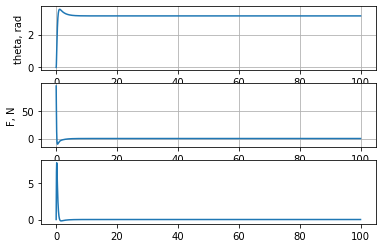

In [328]:


ax = plt.subplot(3,1,1)

ax.plot(t, theta[:, 0])
ax.set_xlabel('t, sec')
ax.set_ylabel('theta, rad')
ax.grid()


ax = plt.subplot(3, 1, 2)
ax.plot(t[0:-1], f)
ax.set_xlabel('t, sec')
ax.set_ylabel('F, N')
ax.grid()
ax = plt.subplot(3,1,3)
ax.plot(t, theta[:,1])
plt.savefig("file1.jpeg")
